In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Gold Rates Dataset.csv")

In [3]:
data.head()

,v1,v2,v3,v4,v5,target
0,48.38,48.40,48.38,48.41,48.46,48.40
1,173.00,174.50,174.00,172.25,176.75,177.50
2,273.75,272.30,272.55,272.70,273.35,272.55
3,453.95,454.90,452.40,450.90,450.60,453.75
4,1232.70,1221.02,1225.90,1219.00,1231.19,1237.20


In [4]:
y = data["target"]
x = data.drop(columns = ["target"] )
x.head() ,y.head()

(        v1       v2       v3       v4       v5
 0    48.38    48.40    48.38    48.41    48.46
 1   173.00   174.50   174.00   172.25   176.75
 2   273.75   272.30   272.55   272.70   273.35
 3   453.95   454.90   452.40   450.90   450.60
 4  1232.70  1221.02  1225.90  1219.00  1231.19,
 0      48.40
 1     177.50
 2     272.55
 3     453.75
 4    1237.20
 Name: target, dtype: float64)

In [220]:
len(x),len(y)
x=x/100
y=y/100

In [221]:
test_data = x.iloc[:2000]
test_targets = y.iloc[:2000]

train_data = x.iloc[len(test_data):-1000]
train_targets = y.iloc[len(test_targets):-1000]

predict_data = x.iloc[-1000:]
predict_targets = y.iloc[-1000:]

In [222]:
len(train_data),len(test_data),len(predict_data),

(10356, 2000, 1000)

In [223]:
np.array(train_data.iloc[0]),train_targets.iloc[0]

(array([3.833 , 3.833 , 3.839 , 3.8135, 3.826 ]), 3.818)

In [224]:
train_data.shape, train_targets.shape

((10356, 5), (10356,))

In [225]:
test_data.shape, test_targets.shape

((2000, 5), (2000,))

In [226]:
train_data.iloc[0].shape

(5,)

In [227]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data -= mean
train_data /= std

test_data -= mean
test_data /= std

predict_data -= mean
predict_data /= std

train_data.iloc[52]

v1    1.550023
v2    1.550244
v3    1.550355
v4    1.556247
v5    1.582835
Name: 2052, dtype: float64

In [228]:
from tensorflow.keras import models, layers

In [229]:
model = models.Sequential()

model.add(layers.Dense(128, activation='relu', input_shape=(5,)))
model.add(layers.BatchNormalization())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [230]:
history = model.fit(train_data, train_targets, epochs=500, verbose=0)

In [231]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

2000/2000 [==============================] - 0s 75us/sample - loss: 0.1053 - mae: 0.2151


<Figure size 432x288 with 0 Axes>

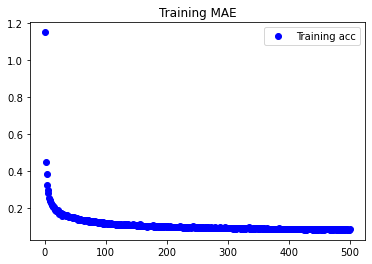

<Figure size 432x288 with 0 Axes>

In [232]:
import matplotlib.pyplot as plt

acc = history.history['mae']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training MAE')
plt.legend()
plt.figure()

In [233]:
model.save("Gold_Price_Prediction_Model2.h5")

In [256]:
def predict(n, data, label):
    
    inp = np.array(data[n]).reshape((1,5))  
    prediction = model.predict(inp)
    
    diff = float(prediction[0][0]) -  float(label[n])
    
    print("Predicted: %s"%(prediction[0][0]*100) + '\n' + "Actual   : %s"%(label[n]*100)
         + '\n' + "Difference: %.2f"%(diff*100))

In [257]:
train_data = np.array(train_data)
train_targets = np.array(train_targets)

test_data = np.array(test_data)
test_targets = np.array(test_targets)

predict_data = np.array(predict_data)
predict_targets = np.array(predict_targets)

In [258]:
predict(1050,train_data,train_targets)
print()
predict(540,test_data,test_targets)

Predicted: 122.51582145690918
Actual   : 115.40000000000002
Difference: 7.12

Predicted: 1175.5520820617676
Actual   : 1225.59
Difference: -50.04


In [259]:
random = [12,450,950,50,754,68,500,69,815,456]
for i in random:
    predict(i,predict_data,predict_targets)
    print()

Predicted: 1295.1790809631348
Actual   : 1333.64
Difference: -38.46

Predicted: 404.5359134674072
Actual   : 403.96999999999997
Difference: 0.57

Predicted: 326.1625289916992
Actual   : 316.2
Difference: 9.96

Predicted: 399.45127964019775
Actual   : 398.41
Difference: 1.04

Predicted: 76.25011205673218
Actual   : 66.85
Difference: 9.40

Predicted: 881.8991661071777
Actual   : 891.15
Difference: -9.25

Predicted: 1644.0296173095703
Actual   : 1742.0200000000002
Difference: -97.99

Predicted: 356.4732789993286
Actual   : 342.45
Difference: 14.02

Predicted: 1079.7929763793945
Actual   : 1142.55
Difference: -62.76

Predicted: 710.3782653808594
Actual   : 730.3
Difference: -19.92



# Predicting Latest Data

In [239]:
from fetch_data import get_latest_data

In [285]:
o = get_latest_data()

Fetching data......

09-Oct-2020 : 1930.33
08-Oct-2020 : 1895.3
07-Oct-2020 : 1887.07
06-Oct-2020 : 1880.15
05-Oct-2020 : 1912.4




In [287]:
len(o),o

In [289]:
p = []
for i in o:
    p.append(float(i)/100)
p

[19.3033, 18.953, 18.8707, 18.8015, 19.124000000000002]

In [290]:
an_array = np.array(p)

an_array -= mean
an_array /= std

In [291]:
an_array

v1    2.963948
v2    2.889753
v3    2.872527
v4    2.859021
v5    2.929986
dtype: float64

In [264]:
def predict_1d(data):
    inp = np.array(data).reshape((1,5))  
    prediction = model.predict(inp)
    
    print("Predicted: %s"%(prediction[0][0]*100))

In [294]:
predict_1d(an_array)

Predicted: 1805.381965637207


In [348]:
import json

In [374]:
dictionary = {
    "mean":list(mean),
    "std" :list(std)
}
print(dictionary,"\n")
print(type(dictionary))

{'mean': [5.560248376786387, 5.558829971031259, 5.557766830822697, 5.556212640981021, 5.554484666859771], 'std': [4.636739164735186, 4.635057018774363, 4.63457134642495, 4.632804540472007, 4.631256802795307]} 

<class 'dict'>


In [346]:
with open("mean_info.json","w") as json_file:
    json.dump(dictionary,json_file)
json_file.close()

In [363]:
json_file = open("mean_info.json","r")
f = json.load(json_file)
f

{'mean': [5.560248376786387,
  5.558829971031259,
  5.557766830822697,
  5.556212640981021,
  5.554484666859771],
 'std': [4.636739164735186,
  4.635057018774363,
  4.63457134642495,
  4.632804540472007,
  4.631256802795307]}

In [366]:
mean_f = np.array(f['mean'])
std_f = np.array(f['std'])
json_file.close()

In [369]:
an_array_f = np.array(p)

an_array_f -= mean_f
an_array_f /= std_f

In [370]:
an_array,an_array_f

(v1    2.963948
 v2    2.889753
 v3    2.872527
 v4    2.859021
 v5    2.929986
 dtype: float64,
 array([2.96394754, 2.88975302, 2.8725274 , 2.85902141, 2.92998551]))

In [371]:
predict_1d(an_array_f)

Predicted: 1805.381965637207


In [377]:
import pprint
pprint.pprint(f)

{'mean': [5.560248376786387,
          5.558829971031259,
          5.557766830822697,
          5.556212640981021,
          5.554484666859771],
 'std': [4.636739164735186,
         4.635057018774363,
         4.63457134642495,
         4.632804540472007,
         4.631256802795307]}
